<a href="https://colab.research.google.com/github/juliosdutra/Controle_de_Processos_UFES/blob/main/Miscellaneous/lista2_poluente.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

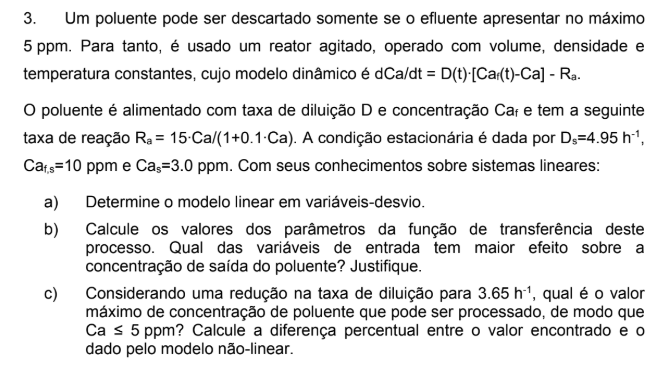

In [1]:
! pip install -qq control

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.6/549.6 kB 11.4 MB/s eta 0:00:00


In [3]:
import numpy as np
import control as ct
import matplotlib.pyplot as plt
import sympy as sp

In [4]:
# Parâmeros do problema
Ds = 4.95
Cafs = 10.0
Cas = 3.0

# Variáveis simbólicas
Ca, Caf, D = sp.symbols('Ca, Caf, D') # Variaveis originais
Ca_, Caf_, D_ = sp.symbols('Ca_, Caf_, D_') # Variaveis-desvio

# Função não linear
Ra = 15.0*Ca/(1+0.1*Ca)
f = D*(Caf-Ca) - Ra
f

-15.0*Ca/(0.1*Ca + 1) + D*(-Ca + Caf)

In [5]:
# Verificando a condição estacionária
nominal = {Ca: Cas, Caf: Cafs, D: Ds}
if abs(f.subs(nominal))<0.1:
  print('Sistema em estado estacionário.')
else:
  print('A condição nominal não é estacionária.')

Sistema em estado estacionário.


In [ ]:
# Prodicedimento de linearização simbólica
dfdCa = f.diff(Ca).subs(nominal)
dfdCaf = f.diff(Caf).subs(nominal)
dfdD =  f.diff(D).subs(nominal)

f_linear = dfdCa*Ca_ +  dfdCaf*Caf_ + dfdD*D_
f_linear